# Experiment 3-1
# KNN with 5 features


In [9]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [11]:
student_df = pd.read_csv("StudentsPerformance.csv")

# student_df.head()
# student_df.info()

## 8:1:1

In [12]:
# 1. Prepare data
X = student_df[['11', '22', '25', '26', '30']]  # 5 features
y = student_df['GRADE']

# 2. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)
# 8:1:1 = train:val:test

# 3. Scale features (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 6:2:2 

In [112]:
# 1. Prepare data
X = student_df[['11', '22', '25', '26', '30']]  # 5 features
y = student_df['GRADE']

# 2. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
# 6:2:2 = train:val:test

# 3. Scale features (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 7:1.5:1.5 

In [21]:
# 1. Prepare data
X = student_df[['11', '22', '25', '26', '30']]  # 5 features
y = student_df['GRADE']

# 2. Split data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)
# 7:1.5:1.5 = train:val:test

# 3. Scale features (important for KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:

# 4. Try different K values to find the best one
k_values = [3, 5, 7, 9, 11]
best_score = -float('inf')
best_k = None

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    print(f"K={k}, R² Score: {score:.3f}")
    
    if score > best_score:
        best_score = score
        best_k = k

# 5. Train final model with best K
knn_final = KNeighborsRegressor(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)

# 6. Make predictions and evaluate
predictions = knn_final.predict(X_test_scaled)
print(f"\nFinal Model (K={best_k}):")
print(f"R² Score: {r2_score(y_test, predictions):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.3f}")

print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")

# 7. For making predictions on new data
new_data = pd.DataFrame({
    '11': [1, 6],
    '22': [2, 1],
    '25': [2, 3],
    '26': [2, 3],
    '30': [3, 5]
})

new_data_scaled = scaler.transform(new_data)
new_predictions = knn_final.predict(new_data_scaled)
print("\nPredictions for new data:", new_predictions)

K=3, R² Score: 0.073
K=5, R² Score: 0.039
K=7, R² Score: -0.125
K=9, R² Score: 0.002
K=11, R² Score: -0.013

Final Model (K=3):
R² Score: 0.073
RMSE: 2.134
MSE: 4.555555555555556
MAE: 1.8444444444444446

Predictions for new data: [3.66666667 5.33333333]


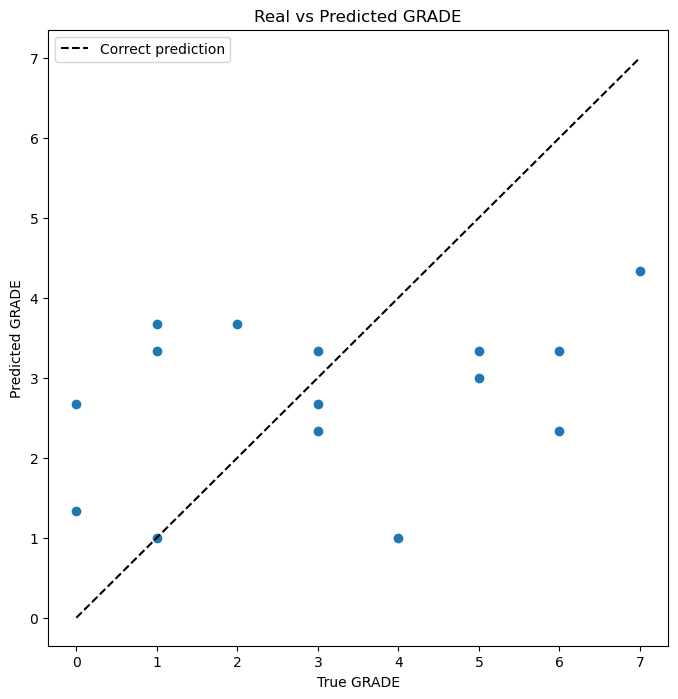

In [14]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True GRADE')
plt.ylabel('Predicted GRADE')
plt.title("Real vs Predicted GRADE")

plt.legend()

# <mark>KNN with strong features
# Select only features with meaningful correlation

In [1]:

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import *


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [25]:
student_df = pd.read_csv("StudentsPerformance.csv")

# student_df.head()
# student_df.info()

In [30]:
# 1. First, let's check correlation of ALL numeric columns with your target
numeric_columns = student_df.select_dtypes(include=[np.number]).columns
correlations = student_df[numeric_columns].corr()['GRADE'].sort_values(ascending=False)
print("Top correlations with target:")
print(correlations)

# 2. Select only the most correlated features (|correlation| > 0.1)
better_features = correlations[abs(correlations) > 0.2].index.tolist()
better_features.remove('GRADE')  # Remove target from features
better_features = ['2', '29', '30', '18', '5','GRADE', '22','9','8', '20', '21']

print("\nSelected features based on correlation:")
print(better_features)

Top correlations with target:
GRADE        1.000000
2            0.335533
29           0.315493
30           0.248588
18           0.195617
5            0.167445
27           0.146547
COURSE ID    0.142166
28           0.110617
3            0.104821
26           0.085137
13           0.084470
24           0.073783
14           0.066379
11           0.066318
12           0.063504
25           0.044862
4            0.023963
10           0.023683
23           0.014638
19           0.003189
15          -0.030747
17          -0.033065
16          -0.044268
7           -0.051778
6           -0.062993
1           -0.095251
22          -0.139564
9           -0.156289
8           -0.166352
20          -0.184763
21          -0.203273
Name: GRADE, dtype: float64

Selected features based on correlation:
['2', '29', '30', '18', '5', 'GRADE', '22', '9', '8', '20', '21']


## 8:1:1

In [19]:

# Use only strong features
X = student_df[better_features]
y = student_df['GRADE']

# Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.11, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6:2:2 

In [12]:
# Use only strong features
X = student_df[better_features]
y = student_df['GRADE']
# Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7:1.5:1.5 

In [27]:
# Use only strong features
X = student_df[better_features]
y = student_df['GRADE']
# Split and scale
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.18, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:


# Try smaller K values and weights
k_values = [2, 3, 4, 5 ]
weights_options = ['uniform', 'distance']

best_score = -float('inf')
best_params = None

for k in k_values:
    for weights in weights_options:
        knn = KNeighborsRegressor(n_neighbors=k, weights=weights)
        knn.fit(X_train_scaled, y_train)
        score = knn.score(X_test_scaled, y_test)
        print(f"K={k}, weights={weights}, R² Score: {score:.3f}")
        
        if score > best_score:
            best_score = score
            best_params = (k, weights)

# Train final model with best parameters
k_best, weights_best = best_params
knn_final = KNeighborsRegressor(n_neighbors=k_best, weights=weights_best)
knn_final.fit(X_train_scaled, y_train)


# Evaluate
predictions = knn_final.predict(X_test_scaled)
print("\nKNN Metrics:")
print(f"\nFinal Model (K={k_best}, weights={weights_best}):")
print(f"R² Score: {r2_score(y_test, predictions):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions)):.3f}")

print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")


K=2, weights=uniform, R² Score: 0.700
K=2, weights=distance, R² Score: 0.726
K=3, weights=uniform, R² Score: 0.738
K=3, weights=distance, R² Score: 0.774
K=4, weights=uniform, R² Score: 0.790
K=4, weights=distance, R² Score: 0.815
K=5, weights=uniform, R² Score: 0.786
K=5, weights=distance, R² Score: 0.816

KNN Metrics:

Final Model (K=5, weights=distance):
R² Score: 0.816
RMSE: 0.989
MSE: 0.9780667003189766
MAE: 0.7521993098984954


In [14]:
new_data = pd.DataFrame({
    '2': [1, 6],  # Example values
    '29': [2, 5],
    '30': [2, 5],
    '18': [2, 3],
    '5': [1, 2],
    '22': [2, 1],
    '9': [1, 2],
    '8': [1, 4],
    '20': [1, 2],
    '21': [2, 1]
})

predictions = knn_final.predict(new_data)
print("Predictions:", predictions)


Predictions: [2. 5.]


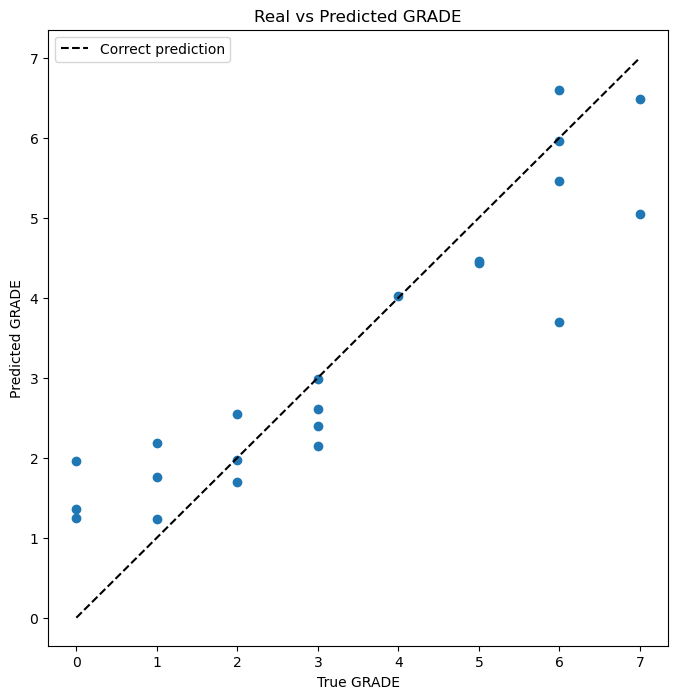

In [29]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.xlabel('True GRADE')
plt.ylabel('Predicted GRADE')
plt.title("Real vs Predicted GRADE")

plt.legend()